# 1. Import libraries

In [1]:
# Import relevant libraries.
import nltk

In [2]:
import pandas as pd

# 2. Data Preprocessing

In [3]:
# Load the file
df3= pd.read_csv('reviews.csv')

In [4]:
# Explore the columns and data
df3.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [5]:
# Identify sentiment value count- 5 is very satisified, 1 is very unsatisified. 
df3.Rating.value_counts()

5    13131
4     5077
3     2871
2     1565
1      842
Name: Rating, dtype: int64

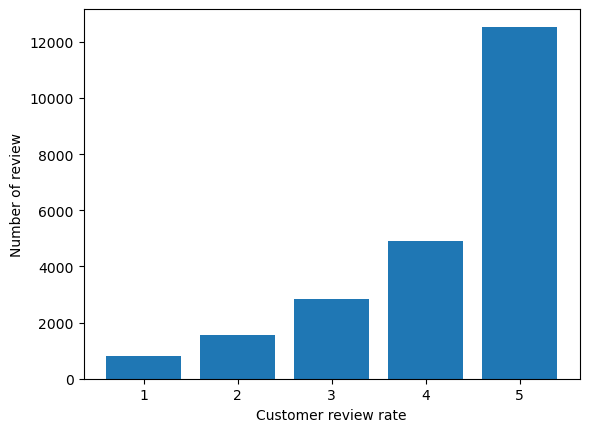

In [6]:
# Identify sentiment with visualization
import matplotlib.pyplot as plt
Rating_count = df3.groupby(df3['Rating']).count()
plt.bar(Rating_count.index.values, Rating_count['Review Text'])
plt.xlabel('Customer review rate')
plt.ylabel('Number of review')
plt.show()


In [7]:
# Drop the irrelevant data/columns which is not used for text analysis 
df3.drop(['Clothing ID', 'Age','Title','Recommended IND','Positive Feedback Count','Division Name','Department Name', 'Class Name'], axis=1 , inplace= True)

In [8]:
# Drop the null data
df3 =df3.dropna()


In [9]:
#confirm if the null data and unnecessary columns are all droped.
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22641 entries, 0 to 23485
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   22641 non-null  int64 
 1   Review Text  22641 non-null  object
 2   Rating       22641 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 707.5+ KB


In [10]:
df3.head()

,Unnamed: 0,Review Text,Rating
0,0,Absolutely wonderful - silky and sexy and comf...,4
1,1,Love this dress! it's sooo pretty. i happene...,5
2,2,I had such high hopes for this dress and reall...,3
3,3,"I love, love, love this jumpsuit. it's fun, fl...",5
4,4,This shirt is very flattering to all due to th...,5


In [11]:
df3.drop(df3.columns[0], axis=1) #remove unnamed column as well to tidy up the dataset.

,Review Text,Rating
0,Absolutely wonderful - silky and sexy and comf...,4
1,Love this dress! it's sooo pretty. i happene...,5
2,I had such high hopes for this dress and reall...,3
3,"I love, love, love this jumpsuit. it's fun, fl...",5
4,This shirt is very flattering to all due to th...,5
...,...,...
23481,I was very happy to snag this dress at such a ...,5
23482,"It reminds me of maternity clothes. soft, stre...",3
23483,"This fit well, but the top was very see throug...",3
23484,I bought this dress for a wedding i have this ...,3


In [12]:
# Print some example of the review text. 
print(df3['Review Text'] [0])

Absolutely wonderful - silky and sexy and comfortable


In [13]:
# conduct tokenization and remove stopwords
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

In [14]:
# Make all sentences as  a lower case words and remove stopwords. Also set ngram_range
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase = True, stop_words ='english',ngram_range = (1,2), tokenizer = token.tokenize)
text_counts = cv.fit_transform(df3['Review Text'])              

In [15]:
stopwords = nltk.corpus.stopwords.words('english')

# 3. Split the data set to train and test set.

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(text_counts, df3 ['Rating'], test_size= 0.3, random_state=1)

In [17]:
# Confirm the amount of the train and test set.
X_train.shape, X_test.shape

((15848, 264732), (6793, 264732))

# 4. Modeling and evaluation

In [18]:
# Test with Naive Bayes and voting essemble model (soft voting).
# Also, using TF-IDF for feature vectorization to find better model performance.

## 1) Naive  Bayes classifier 


In [19]:
# Import naive_bayes lcassifier for modeling and metrics for evaluation
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
clf = MultinomialNB().fit(X_train,y_train)
predicted = clf.predict(X_test)

print("Accuracy score:", metrics.accuracy_score(y_test, predicted))

Accuracy score: 0.5854556160753717


## 2) TF-IDF 

In [20]:
# Using  TF_IDF and conduct feature generation
from sklearn.feature_extraction.text import TfidfVectorizer
tf= TfidfVectorizer()
text_tf= tf.fit_transform(df3['Review Text'])

In [21]:
#Split the dataset to train and test set.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
text_tf,df3['Rating'],test_size= 0.3,random_state=123)


In [22]:
# Model generation using naive bayes model
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
clf = MultinomialNB().fit(X_train,y_train)
predicted = clf.predict(X_test)
print("MultinomialNB Accuracy", metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy 0.5552774915354041


## 3) Using Voting classifier to compare with Naive Bayes classifier

In [23]:
# Using  TF_IDF and conduct feature generation
from sklearn.feature_extraction.text import TfidfVectorizer
tf= TfidfVectorizer()
text_tf= tf.fit_transform(df3['Review Text'])

In [26]:
#Split the dataset to train and test set.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
text_tf,df3['Rating'],test_size= 0.3,random_state=123)

In [27]:
# Model generation using ensemble model - voting classifier
# Import relevant libraries
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Using Logistic regression and KNN models for voting.
LR = LogisticRegression(random_state=42, max_iter=1000)  #Limit the max itration as its default option causes error due to very high learning rate.
KNN = KNeighborsClassifier(n_neighbors=8)

#train and predict by model.
vo_clf= VotingClassifier (estimators=[('LR',LR),('KNN', KNN)],voting='soft') # using soft voting
vo_clf.fit(X_train,y_train)
predicted = vo_clf.predict(X_test)

#Evaluation.
print(" Voting classifier Accuracy", metrics.accuracy_score(y_test, predicted))

 Voting classifier Accuracy 0.6196084204327985


# 5. Hyperparameter tuning

In [28]:
# Confirm that the voting classifier has better performance than Naive Bayes classifier.
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

LR = LogisticRegression(random_state=42, max_iter=1000)
KNN = KNeighborsClassifier()

vo_clf= VotingClassifier (estimators=[('LR',LR),('KNN', KNN)],voting='soft')

# Set the hyperparameter dictionary
params = {'LR__C': [0.1, 1.0, 10.0], 'KNN__n_neighbors': [3, 5, 7],}

# Create the GridSearchCV object
grid_search = GridSearchCV(vo_clf, param_grid=params, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the dataset
grid_search.fit(X_train, y_train)

#result
print("Best hyperparameters:", grid_search.best_params_)
print("Best accuracy score:", grid_search.best_score_)


Best hyperparameters: {'KNN__n_neighbors': 7, 'LR__C': 10.0}
Best accuracy score: 0.6244950839809551
